Exercise Sheet 22 **Decision Making I**

__Adu Matory__ and __Lukas Braun__, November 22

In [0]:
import numpy as np
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

**Exercise 1: Extended drift-diffusion model**

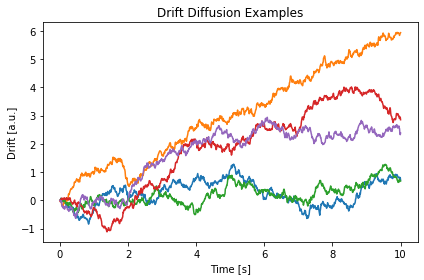

In [0]:
# 1.1
def euler_maruyama(x0, a, b, length, dt, threshold=0, a_params=None):
    res = [x0]
    for i, t in enumerate(np.linspace(dt, length, int(length/dt)-1)):
        if a_params is not None:
            a_ = a(**a_params)
        else:
            a_ = a
        dW = np.random.normal(0, np.sqrt(dt))
        res.append(res[i] + a_*dt + b*dW)
        if threshold != 0:
            if res[i+1] >= threshold or res[i+1] <= -threshold:
                break
    return res

x0 = 0
sigma = 0.5
mu = 0.2
runs = 5
length = 10
dt = 0.01

time = np.linspace(0, length, int(length/dt))
fig, ax = plt.subplots()
for run in range(runs):
    ax.plot(time, euler_maruyama(x0, mu, sigma, length, dt))
ax.set_title("Drift Diffusion Examples")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Drift [a.u.]")
fig.tight_layout()

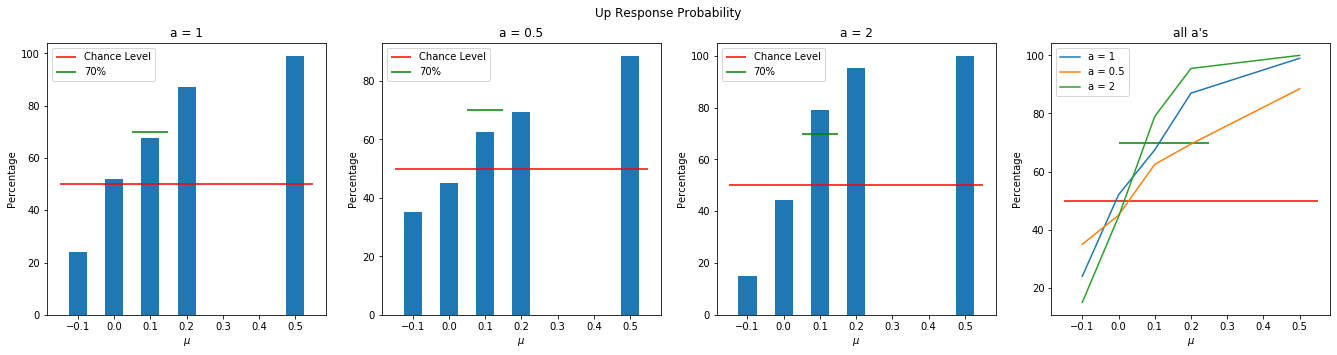

In [0]:
# 1.2
runs = 200
mus = [-0.1, 0, 0.1, 0.2, 0.5]
all_as = [1,.5,2]

fig, ax = plt.subplots(1,4,figsize=(23,5))
fig.subplots_adjust(hspace = .2, wspace=.2)
fig.suptitle("Up Response Probability")

for i,a in enumerate(all_as):
  percentages = []
  for mu in mus:
      ups = 0
      downs = 0
      for run in range(runs):
          while True:
              response = euler_maruyama(x0, mu, sigma, length, dt, a)[-1]
              if response >= a:
                  ups += 1
                  break
              elif response <= -a:
                  downs += 1
                  break
      percentages.append(ups/runs*100)

  ax[i].bar(mus, percentages, width=0.05)
  ax[i].set_title(f"a = {a}")
  ax[i].hlines(50, -0.15, 0.55, color="red", label="Chance Level")
  ax[i].hlines(70, 0.05, 0.15, color="green", label="70%")
  ax[i].set_xlabel("$\\mu$")
  ax[i].set_ylabel("Percentage")
  ax[i].legend()

  ax[3].set_title("all a's")
  ax[3].plot(mus,percentages,label=f'a = {a}')
  ax[3].set_xlabel("$\\mu$")
  ax[3].set_ylabel("Percentage")
  ax[3].legend()

ax[3].hlines(50, -0.15, 0.55, color="red", label="Chance Level")
ax[3].hlines(70, 0.0, 0.25, color="green", label="70%")

plt.show()

**What happens to this curve if you double, what if you half the value of a?**

If we double the value of a, the curve increases exponentially and if we half the value, it doesn't increase as fast, for increasing mu > 0.

Mean Reaction Time Up 3.5275243393602227
Mean Reaction Time Down 3.2062989323843416


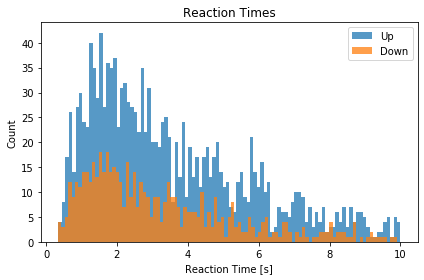

In [0]:
# 1.3/1.4
mu_70 = 0.1
runs = 2000
a = 1

up_times = []
down_times = []
for run in range(runs):
    while True:
        response = euler_maruyama(x0, mu_70, sigma, length, dt, a)
        if response[-1] >= a:
            up_times.append(len(response)*dt)
            break
        elif response[-1] <= -1:
            down_times.append(len(response)*dt)
            break

fig, ax = plt.subplots()
ax.hist(up_times, bins=100, alpha=0.75, label="Up")
ax.hist(down_times, bins=100, alpha=0.75, label="Down")
ax.set_title("Reaction Times")
ax.set_xlabel("Reaction Time [s]")
ax.set_ylabel("Count")
ax.legend()
fig.tight_layout()

print(f"Mean Reaction Time Up {np.mean(up_times)}")
print(f"Mean Reaction Time Down {np.mean(down_times)}")

**Discuss whether (and why) this is what you would have expected**

The mean reaction time for X to hit +a and -a is roughly the same, however the difference in count is quite different. This can be expalined by our mu = 0.1, which skews the the drift toward positive values.  It makes sense that with such a small mu and a large sigma, 0.5, we experience this proportion of upper vs. lower boundaries reached over many trials.

Mean Reaction Time Up 3.437867910983489
Mean Reaction Time Down 3.3869028006589783


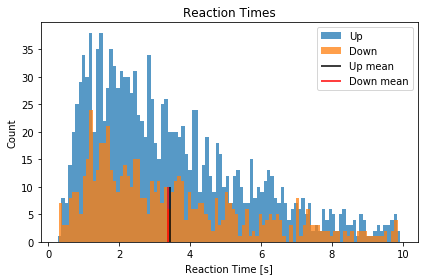

In [0]:
# 2.5
mu = np.random.normal
params = {"loc": 0.1, "scale": 0.0002}
runs = 2000

up_times = []
down_times = []
for run in range(runs):
    while True:
        response = euler_maruyama(x0, mu, sigma, length, dt, a, params)
        if response[-1] >= a:
            up_times.append(len(response)*dt)
            break
        elif response[-1] <= -1:
            down_times.append(len(response)*dt)
            break

fig, ax = plt.subplots()
ax.hist(up_times, bins=100, alpha=0.75, label="Up")
ax.vlines(np.mean(up_times), 0, 10, colors='k',label="Up mean")
ax.hist(down_times, bins=100, alpha=0.75, label="Down")
ax.vlines(np.mean(down_times), 0, 10, colors='r',label='Down mean')
ax.set_title("Reaction Times")
ax.set_xlabel("Reaction Time [s]")
ax.set_ylabel("Count")
ax.legend()
fig.tight_layout()

print(f"Mean Reaction Time Up {np.mean(up_times)}")
print(f"Mean Reaction Time Down {np.mean(down_times)}")

Mean 0.1 Var 0.0: 69.38 +/- 1.4455
Mean 0.11 Var 1.25: 69.76 +/- 1.0781
Mean 0.13 Var 2.5: 70.38 +/- 1.3666
Mean 0.2 Var 5: 69.75 +/- 1.656
Mean 0.5 Var 10: 69.72 +/- 1.0088
Mean 1.6 Var 20: 69.78 +/- 1.1152


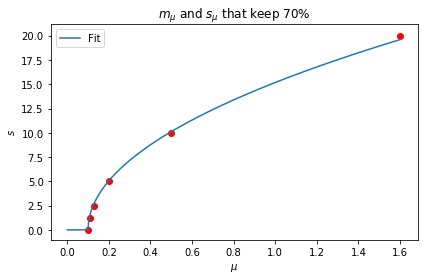

In [0]:
# 2.5
mu = np.random.normal
runs = 1000

means = []
value_pairs = [(0.1, 0.), (0.11, 1.25), (0.13, 2.5), (0.2, 5), (0.5, 10), (1.6, 20)]
for loc, scale in value_pairs:
    params = {"loc": loc, "scale": scale}
    percentages = []
    for i in range(10):
        ups = 0
        downs = 0
        for run in range(runs):
            while True:
                response = euler_maruyama(x0, mu, sigma, length, dt, a, params)[-1]
                if response >= a:
                    ups += 1
                    break
                elif response <= -1:
                    downs += 1
                    break
        percentages.append(ups/runs*100)
    print(f"Mean {loc} Var {scale}: {np.mean(percentages):.5} +/- {np.std(percentages):.5}")

fig, ax = plt.subplots()
for loc, scale in value_pairs:
    ax.scatter(loc, scale, color="red")
x = np.linspace(0, 1.6, 1000)
x_ = x.copy()
x -= 0.1
x[x <= 0] = 0
ax.plot(x_, np.sqrt(x)*16, label="Fit")
ax.set_title("$m_\\mu$ and $s_\\mu$ that keep 70%")
ax.set_xlabel("$\\mu$")
ax.set_ylabel("$s$")
ax.legend()
fig.tight_layout()

Mean Reaction Time Up 1.016067415730337
Mean Reaction Time Down 1.03953125


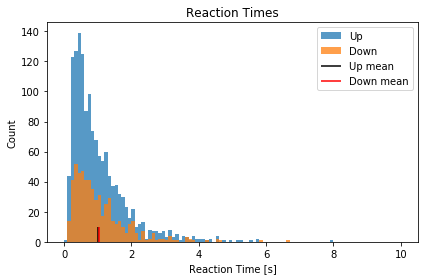

In [0]:
def fit(x):
    return np.sqrt(x-0.1)*16

mu = np.random.normal
params = {"loc": 0.4, "scale": fit(0.4)}
runs = 2000

up_times = []
down_times = []
for run in range(runs):
    while True:
        response = euler_maruyama(x0, mu, sigma, length, dt, a, params)
        if response[-1] >= a:
            up_times.append(len(response)*dt)
            break
        elif response[-1] <= -1:
            down_times.append(len(response)*dt)
            break

fig, ax = plt.subplots()
ax.hist(up_times, range=(0, 10), bins=100, alpha=0.75, label="Up")
ax.vlines(np.mean(up_times), 0, 10, colors='k',label="Up mean")
ax.hist(down_times, range=(0, 10), bins=100, alpha=0.75, label="Down")
ax.vlines(np.mean(down_times), 0, 10, colors='r',label='Down mean')
ax.set_title("Reaction Times")
ax.set_xlabel("Reaction Time [s]")
ax.set_ylabel("Count")
ax.legend()
fig.tight_layout()

print(f"Mean Reaction Time Up {np.mean(up_times)}")
print(f"Mean Reaction Time Down {np.mean(down_times)}")